<a href="https://colab.research.google.com/github/Bhagyasri00/Sales_Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual/Team
##### **Presented by**    - Bhagyasri

# **Project Summary -**

This project involved forecasting daily sales for over 1,000 Rossmann drug stores using historical sales data and store information.

*  Exploratory Data Analysis (EDA) revealed insights such as the linear relationship between customers and sales, the impact of promotions and holidays on sales, and seasonal sales patterns.
*  Data preprocessing involved converting date columns, handling missing values, encoding categorical features, and removing outliers.
Feature engineering included creating new features and removing multicollinear features to improve model performance.
*  Three regression models (Linear Regression, Decision Tree, Elastic Net) were implemented, with hyperparameter tuning to optimize model performance.
Random Forest Regression was selected as the final prediction model due to its superior performance after tuning and its ability to handle non-linearity and feature importance evaluation.
*  Model explainability was achieved through feature importance analysis using Random Forest
*  The final model achieved significant improvements in predictive accuracy, making it a valuable tool for Rossmann store managers to forecast sales and optimize business strategies.


# **GitHub Link -**

https://github.com/Bhagyasri00/Sales_Prediction

# **Problem Statement**


Rossmann operates a large chain of drug stores across seven European countries, totaling over 3,000 stores. Store managers are responsible for predicting daily sales up to six weeks in advance, considering various influencing factors such as promotions, competition, holidays, seasonality, and locality. However, the accuracy of sales predictions varies among individual managers due to their unique circumstances and approaches. To address this variability and improve forecasting accuracy, the task is to develop a robust machine learning model using historical sales data from 1,115 Rossmann stores. The objective is to accurately forecast the "Sales" column for the test set, considering factors like promotions, holidays, and other relevant features. This model will provide store managers with reliable sales forecasts, enabling them to optimize inventory management, staffing, and promotional strategies, thereby enhancing operational efficiency and maximizing revenue across Rossmann stores.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import math
from scipy.stats import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
rossmann_data = pd.read_csv('/content/Rossmann Stores Data.csv')
store_data= pd.read_csv('/content/store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
rossmann_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Rossmann Data Rows and Columns:", rossmann_data.shape)
print("Store Data Rows and Columns:", store_data.shape)

Rossmann Data Rows and Columns: (1017209, 9)
Store Data Rows and Columns: (1115, 10)


### Dataset Information

In [ ]:
# Dataset Info
rossmann_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Dataset Info
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
rossmann_data.duplicated().sum()

0

In [ ]:
# Dataset Duplicate Value Count
store_data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
rossmann_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Missing Values/Null Values Count
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Text(0.5, 1.0, 'Missing Values in Rossmann Data')

<Figure size 1000x600 with 0 Axes>

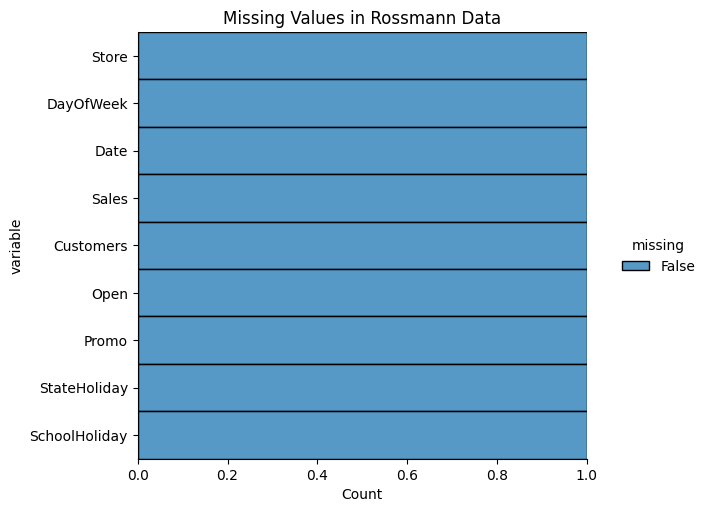

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=rossmann_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title("Missing Values in Rossmann Data")

Text(0.5, 1.0, 'Missing Values in Store Data')

<Figure size 1000x600 with 0 Axes>

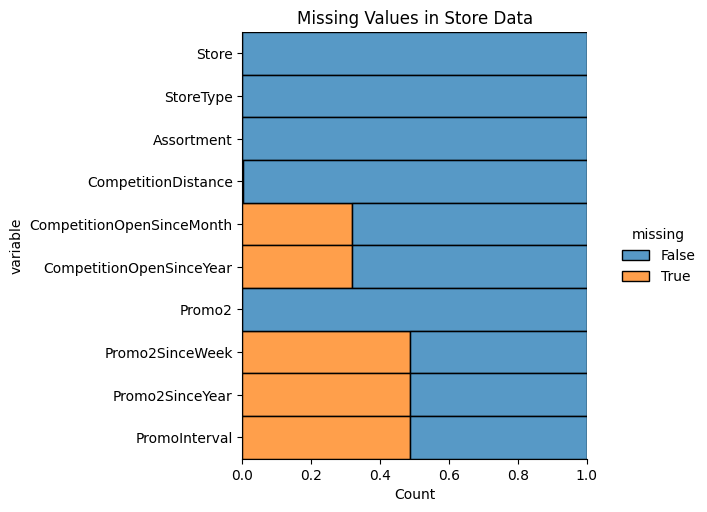

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=store_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title("Missing Values in Store Data")

### What did you know about your dataset?

*     Rossmann data has information about Customers, sales, Holidays, Promotion and whether if shop is closed or open.  
*     Store data has information about the stores, Information about competitors and theirs distance from the store, Promotions made by store and the interval of Promotions
*    Sales Data Rows and Columns: (1017209, 9)
*    Store Data Rows and Columns: (1115, 10)
*     There are no duplicated values in Rossmann and store data.  
*     There are missing values in store data.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
rossmann_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Columns
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
rossmann_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Dataset Describe
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in rossmann_data.columns.tolist():
  print("No. of unique values in ",i,"is",rossmann_data[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .


In [ ]:
# Check Unique Values for each variable.
for i in store_data.columns.tolist():
  print("No. of unique values in ",i,"is", store_data[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


## 3. ***Data Wrangling***

# **EDA on Rossmann Data**

# Variable Description

* Store: Unique identifier for each store.
* DayOfWeek: Day of the week (1 = Monday, 2 = Tuesday, ..., 7 = Sunday).
* Date: Date of the sales data.
* Sales: Total sales for the day (target variable).
* Customers: Number of customers on the day.
* Open: Indicates if the store was open (1 = open, 0 = closed).
* Promo: Indicates if there was a promotion on that day (1 = yes, 0 = no).
* StateHoliday: Indicates if the day was a state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = none).
* SchoolHoliday: Indicates if there was a school holiday on that day (1 = yes, 0 = no)

In [ ]:
# Write your code to make your dataset analysis ready.
# Min and max date
min_date = rossmann_data['Date'].min()
max_date = rossmann_data['Date'].max()
print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2013-01-01
Maximum Date: 2015-07-31


In [ ]:
# Convert Date to datetime and extract year, month, day
rossmann_data['Date'] = pd.to_datetime(rossmann_data['Date'])
rossmann_data['Year'] = rossmann_data['Date'].dt.year
rossmann_data['Month'] = rossmann_data['Date'].dt.month
rossmann_data['Day'] = rossmann_data['Date'].dt.day

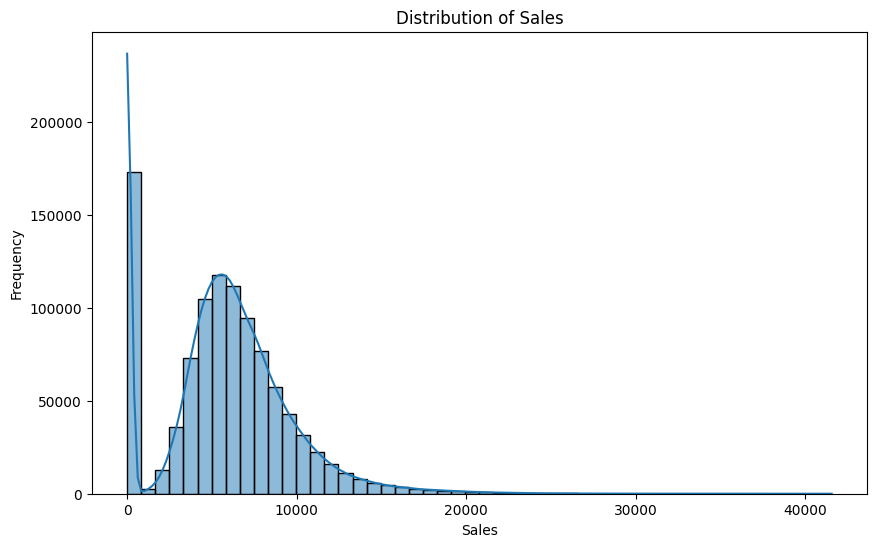

In [ ]:
# Distribution of Sales (displot)
plt.figure(figsize=(10, 6))
sns.histplot(rossmann_data['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

**There is a linear Relationship Between Customer and Sales**




<Figure size 1000x600 with 0 Axes>

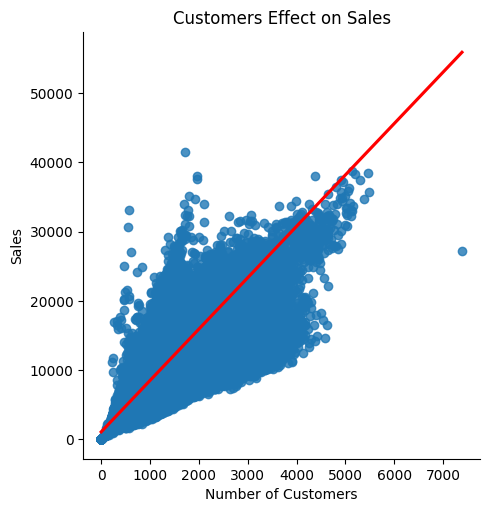

In [ ]:
# Customers Effect on Sales
plt.figure(figsize=(10, 6))
sns.lmplot(x='Customers', y='Sales', data=rossmann_data, line_kws={'color': 'red'})
plt.title('Customers Effect on Sales')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

**Majority of the Stores are closed on Sunday**

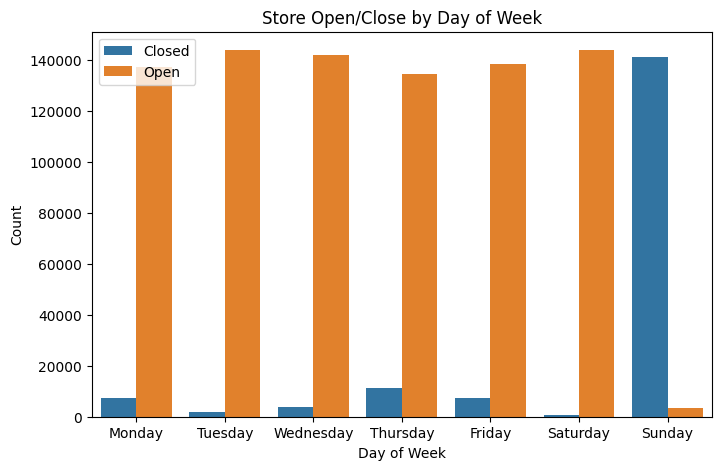

In [ ]:
# Which day open, which day close
plt.figure(figsize=(8, 5))
sns.countplot(x='DayOfWeek', hue='Open', data=rossmann_data)
plt.title('Store Open/Close by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(['Closed', 'Open'])
plt.show()


**Sales are low on Sunday Because the stores are closed on sunday**



In [ ]:
# Aggregate sales data by day of the week
sales_by_day = rossmann_data.groupby('DayOfWeek')['Sales'].mean().reset_index()

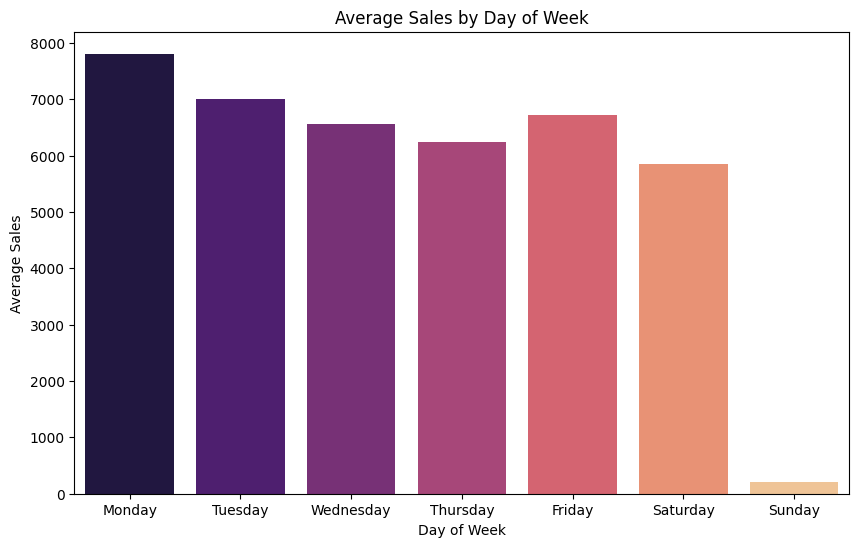

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=sales_by_day, palette='magma')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

**State Holiday Doesn't Effect much on Sales**

In [ ]:
rossmann_data.StateHoliday.value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

Encoding StateHoliday

In [ ]:
rossmann_data['StateHoliday'] = rossmann_data['StateHoliday'].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [ ]:
rossmann_data.StateHoliday.value_counts()

StateHoliday
0    986159
1     31050
Name: count, dtype: int64

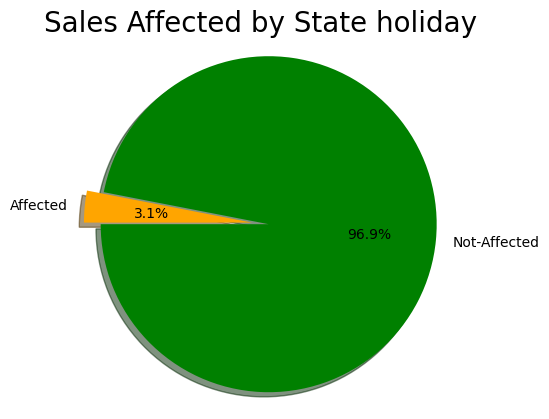

In [ ]:
plt.pie(rossmann_data['StateHoliday'].value_counts(), explode=(0.1, 0.0), labels=['Not-Affected', 'Affected'], colors=['green', 'orange'],
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday", fontsize=20)
plt.show()

**Sales are Affected by School Holiday**

In [ ]:
rossmann_data.SchoolHoliday.value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

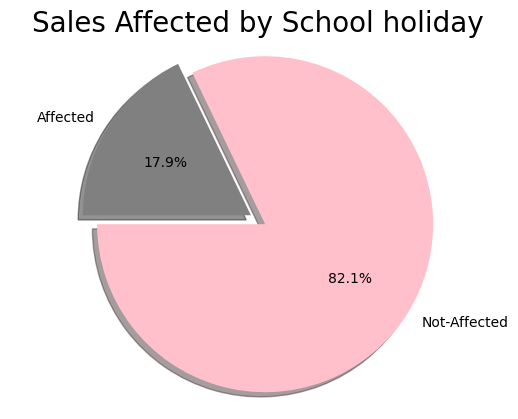

In [ ]:
plt.pie(rossmann_data['SchoolHoliday'].value_counts(), explode=(0.1, 0.0), labels=['Not-Affected', 'Affected'], colors=['Pink', 'Grey'],
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by School holiday", fontsize=20)
plt.show()

**The effect of Promotions is on the Sale**

In [ ]:
promo_counts= rossmann_data.Promo.value_counts()

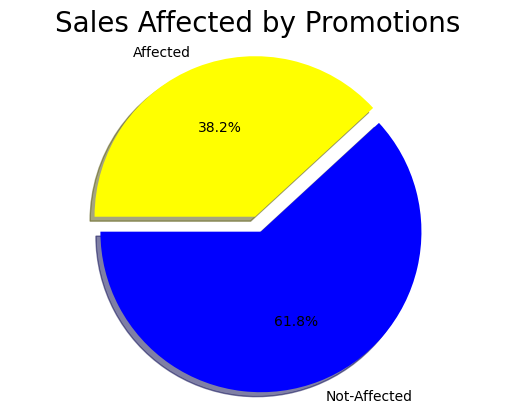

In [ ]:
plt.pie(rossmann_data['Promo'].value_counts(), explode=(0.1, 0.0), labels=['Not-Affected', 'Affected'], colors=['Blue', 'Yellow'],
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Promotions", fontsize=20)
plt.show()

**There is an Increase in Sales Every year**

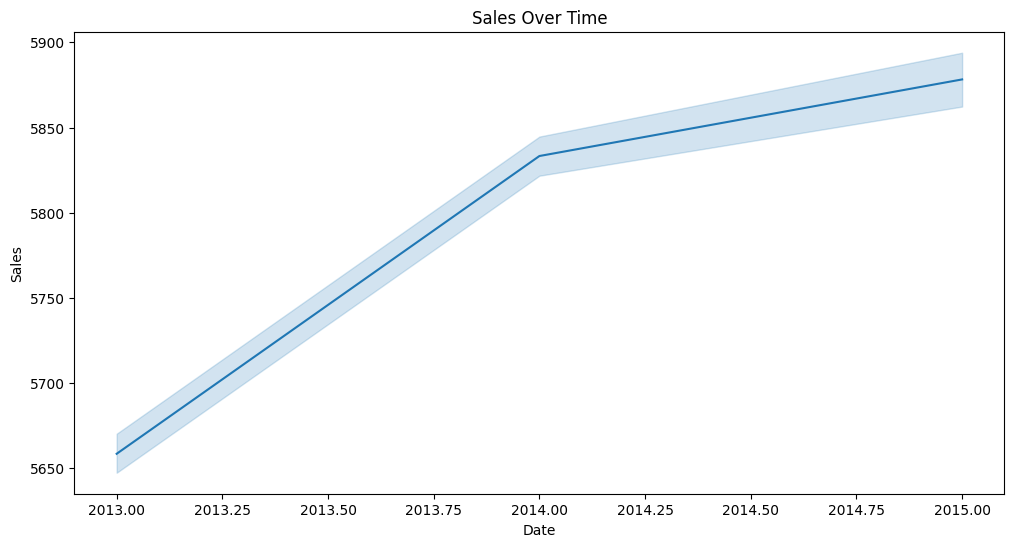

In [ ]:
# Sales over time (line)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Sales', data=rossmann_data)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

**The Sales are Tremendous in the month of December**

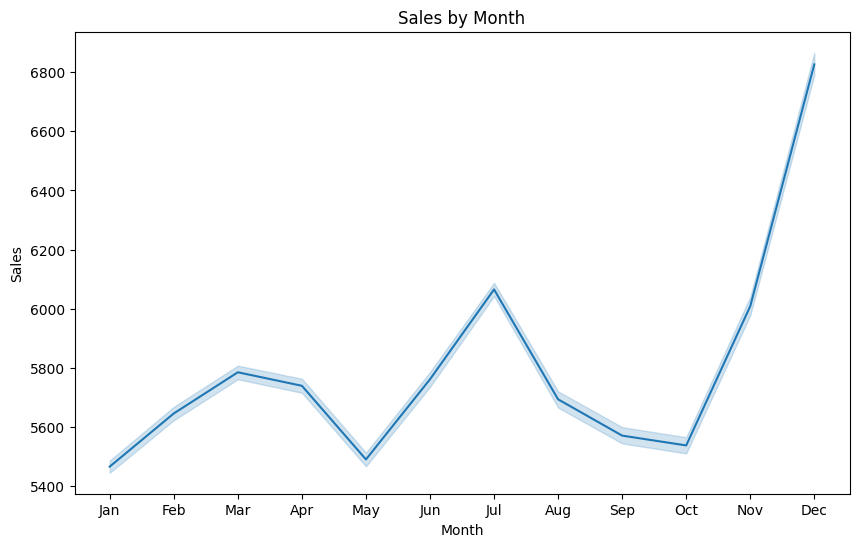

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=rossmann_data)
plt.title('Sales by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**Most of the Sales happen on month end and second of the month**

In [ ]:
# Aggregate sales data by day and calculate the average sales
average_sales_by_day = rossmann_data.groupby('Day')['Sales'].mean().reset_index()

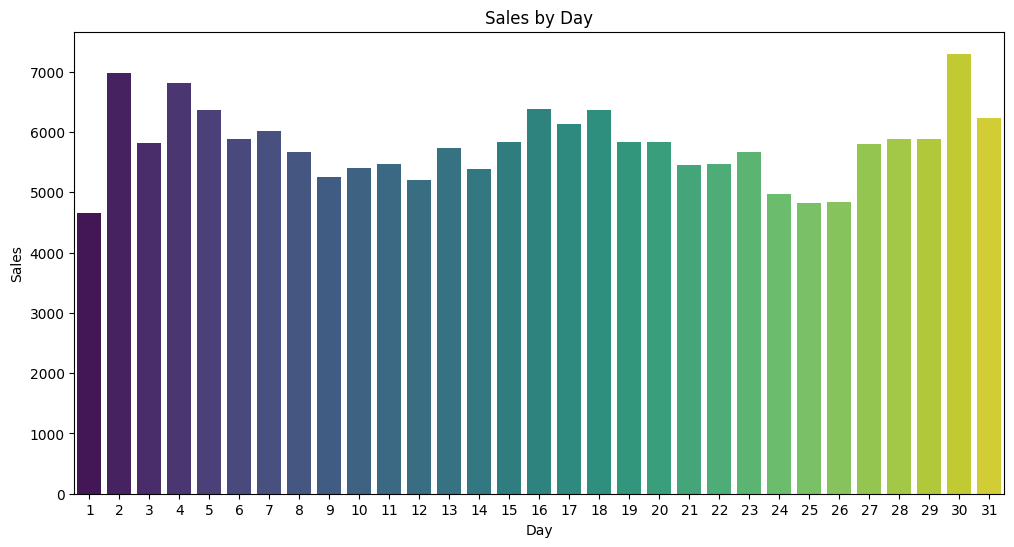

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Day', y='Sales', data=average_sales_by_day, palette='viridis')
plt.title('Sales by Day')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

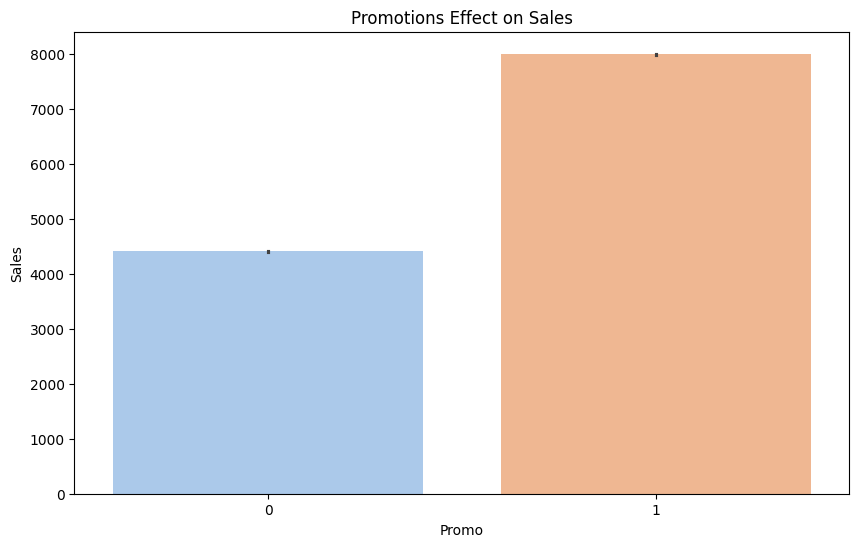

In [ ]:
# Promotions effect on Sales, with promo and without promo (line)
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=rossmann_data, palette= 'pastel')
plt.title('Promotions Effect on Sales')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

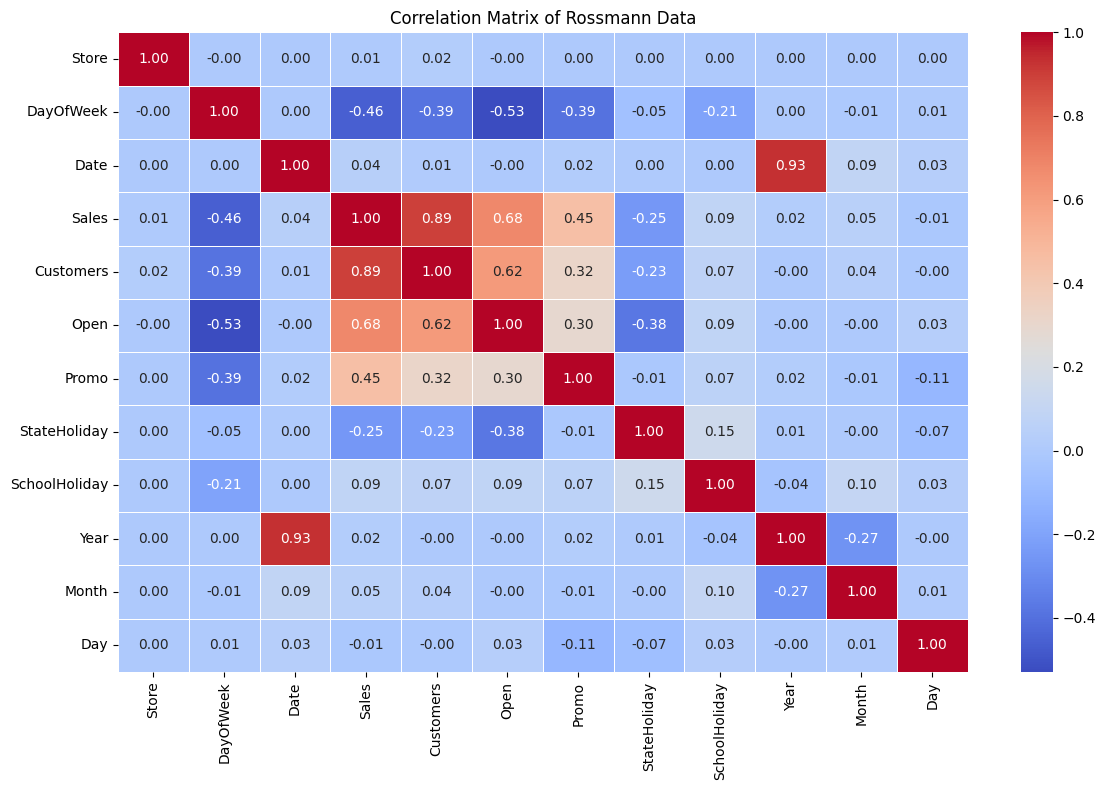

In [ ]:
# Calculate correlation matrix
correlation_matrix = rossmann_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Rossmann Data')
plt.tight_layout()
plt.show()


**Dropping StateHoliday, Since it doesn't effect sales much**

In [ ]:
rossmann_data= rossmann_data.drop(['StateHoliday'], axis=1)

### What all manipulations have you done and insights you found?

*   Created new features for day, month, and year extracted from the "Date" column
*   Encoded categorical variables like "StateHoliday" by mapping
*   There is a positive linear relationship between the number of customers and sales, indicating that higher foot traffic tends to result in higher sales.
*   The majority of the stores are closed on Sundays, which correlates with lower sales on Sundays compared to other days of the week.
*   Sales are typically lower on Sundays due to store closures on that day.
*   State holidays have minimal effect on sales, with only 2.9% of sales occurring during state holidays, compared to 97.1% during regular days.
*   School holidays have a noticeable effect on sales, accounting for 17.9% of total sales.
*   Promotions significantly impact sales, with 38.2% of sales occurring during promotional periods compared to 61.8% during non-promotional periods.
*   There is a consistent increase in sales every year, indicating potential business growth or inflation.
*   December sees the highest sales volume, suggesting increased consumer spending during the holiday season.
*  Sales tend to peak at the end of each month and on the second day of each month, indicating possible salary payment cycles or promotional events.



# **EDA on Store Data**

### Variables Description

* Store: Unique store identifier.
* StoreType: Type of store (categories: 'a', 'b', 'c', 'd').
* Assortment: Level of assortment in the store (categories: 'a', 'b', 'c').
* CompetitionDistance: Distance to the nearest competitor store (in meters).
* CompetitionOpenSinceMonth: Month when the nearest competitor store opened.
* CompetitionOpenSinceYear: Year when the nearest competitor store opened.
* Promo2: Indicates if the store is participating in Promo2 (0 for no, 1 for yes).
* Promo2SinceWeek: Calendar week when Promo2 started.
* Promo2SinceYear: Year when Promo2 started.
* PromoInterval: Months when Promo2 is active (e.g., 'Jan,Apr,Jul,Oct').


In [ ]:
store_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Store  StoreType  Assortment  CompetitionDistance  \
0     False      False       False                False   
1     False      False       False                False   
2     False      False       False                False   
3     False      False       False                False   
4     False      False       False                False   
...     ...        ...         ...                  ...   
1110  False      False       False                False   
1111  False      False       False                False   
1112  False      False       False                False   
1113  False      False       False                False   
1114  False      False       False                False   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         False                     False   False   
1                         False                     False   False   
2                         False                     False   False   
3                         False                     False   False   
4                         False                     False   False   
...                         ...                       ...     ...   
1110                      False                     False   False   
1111                      False                     False   False   
1112                       True                      True   False   
1113                       True                      True   False   
1114                       True                      True   False   

      Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0                True             True           True  
1               False            False          False  
2               False            False          False  
3                True             True           True  
4                True             True           True  
...               ...              ...            ...  
1110            False            False          False  
1111             True             True           True  
1112             True             True           True  
1113             True             True           True  
1114            False            False          False  

[1115 rows x 10 columns]>

In [ ]:
# remove features
store_data = store_data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

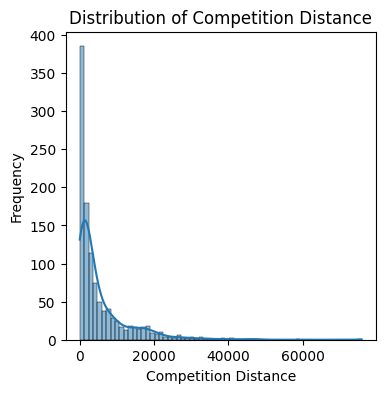

In [ ]:
# 2. Distribution of Competition Distance (Distribution Plot)
plt.figure(figsize=(4, 4))
sns.histplot(data=store_data, x='CompetitionDistance', kde=True)
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
plt.show()

Since the Distribution is Right Skewed, Handling Missing values by the Median

In [ ]:
# replace missing values in CompetitionDistance with median for the store dataset
store_data.CompetitionDistance.fillna(store_data.CompetitionDistance.median(), inplace=True)

**Among all store types, the store type 'a' has the highest count.**

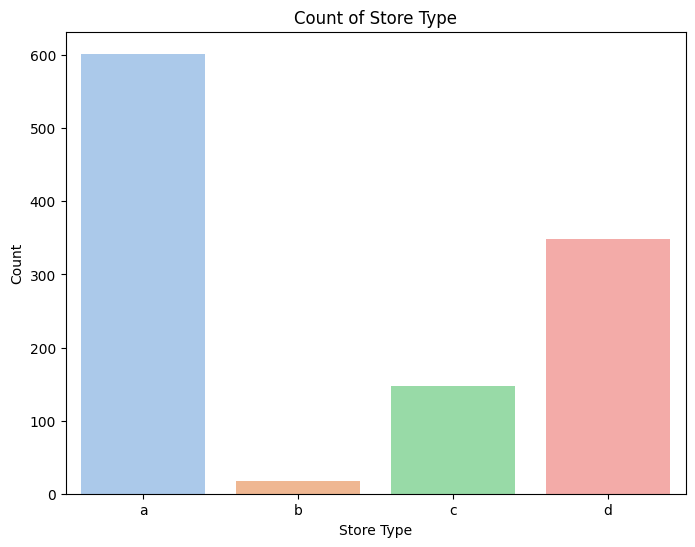

In [ ]:
# 1. Count of Store Type (Bar Plot)
plt.figure(figsize=(8, 6))
sns.countplot(data=store_data.sort_values(by= 'StoreType'), x='StoreType', palette= 'pastel')
plt.title('Count of Store Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

**Stores (a,c,d) have Assortment a,c while store 'b' have Assortment a and c**

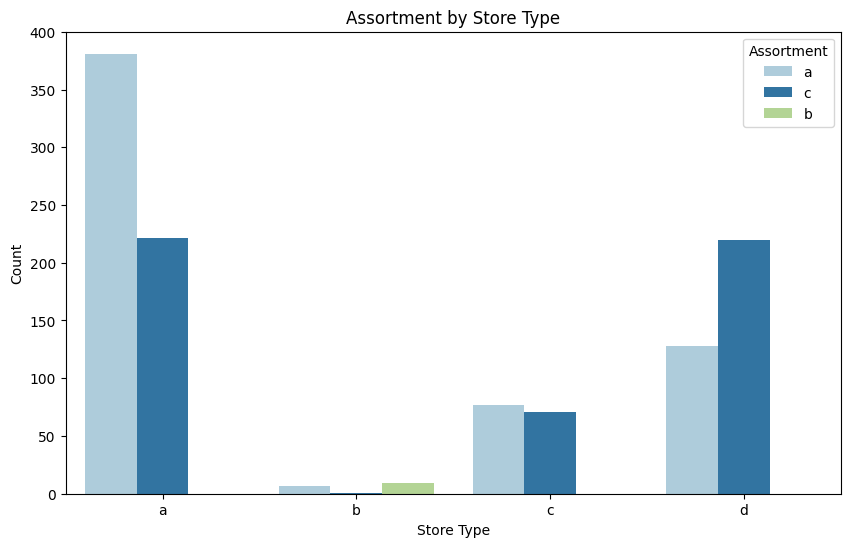

In [ ]:
# Visualize Assortment and Store Type
plt.figure(figsize=(10, 6))
sns.countplot(data=store_data.sort_values(by= 'StoreType'), x='StoreType', hue='Assortment', palette='Paired')
plt.title('Assortment by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.legend(title='Assortment')
plt.show()

####  What all manipulations have you done and insights you found?

*  Features with high missing values have been removed from the analysis to ensure the accuracy of insights derived from the remaining data.
*  Missing values in the competition distance feature have been replaced with the median value to maintain the integrity of the data.
*  Among all store types, store type 'a' has the highest count, indicating that it is the most common store type among the dataset.
*  Stores with types 'a', 'c', and 'd' have assortments 'a' and 'c', while store 'b' only has assortment 'a'. This suggests variation in product assortments across different store types, potentially catering to different customer preferences or market segments.








# Merging Rossmann_data and Store_data



In [ ]:
df = pd.merge(rossmann_data, store_data, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,a,a,29910.0,0


# **EDA on Merged data**

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2'],
      dtype='object')

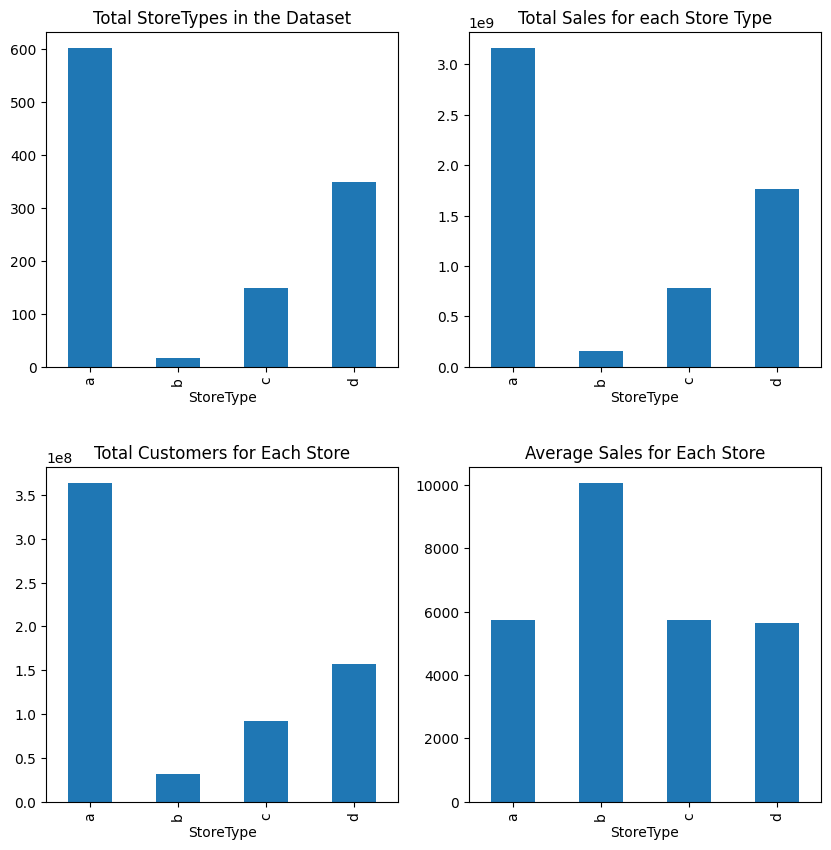

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (10,10))

store_data.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales for each Store Type")
df.groupby('StoreType')['Customers'].sum().plot(kind='bar', ax=ax[1,0], title= "Total Customers for Each Store")
df.groupby('StoreType')['Sales'].mean().plot(kind='bar', ax=ax[1, 1], title= "Average Sales for Each Store")

plt.subplots_adjust(hspace = 0.3)
plt.show()

Promotion Runs only on week days

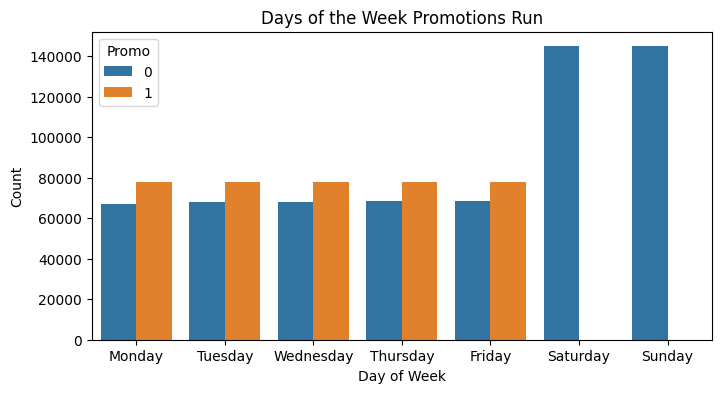

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='DayOfWeek', hue='Promo', data=df)
plt.title('Days of the Week Promotions Run')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Promo')
plt.show()

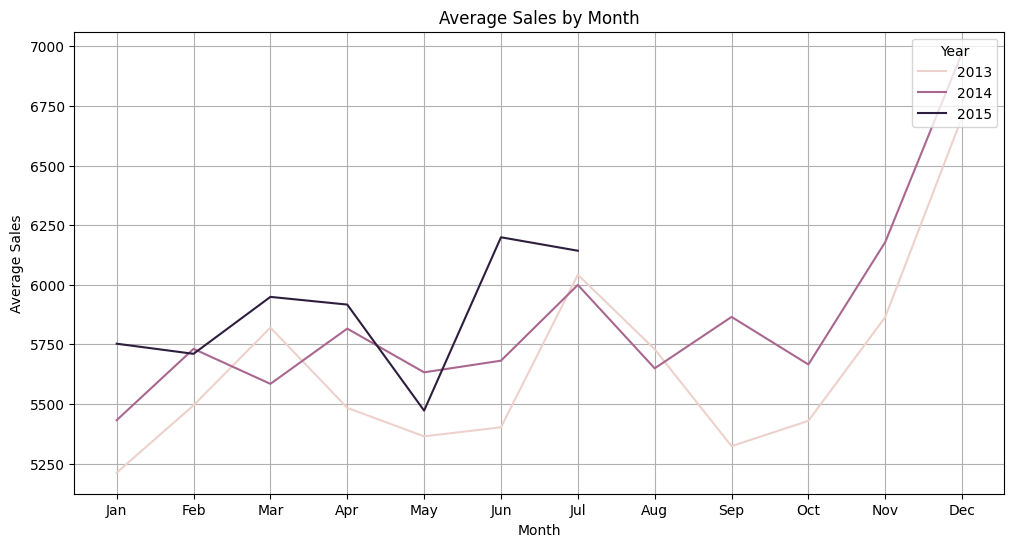

In [ ]:
avg_sales_by_month = df.groupby(['Year', 'Month'])['Sales'].mean().reset_index()

# Plot average sales by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_sales_by_month, x='Month', y='Sales', hue='Year')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()

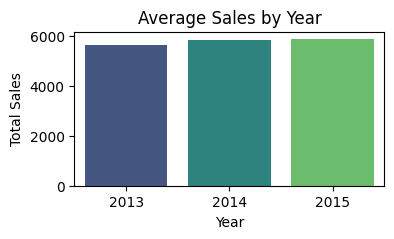

In [ ]:
sales_by_year = df.groupby('Year')['Sales'].mean().reset_index()

# Plot bar graph for sales by year
plt.figure(figsize=(4,2))
sns.barplot(x='Year', y='Sales', data=sales_by_year, palette='viridis')
plt.title('Average Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


Text(0, 0.5, 'Sales')

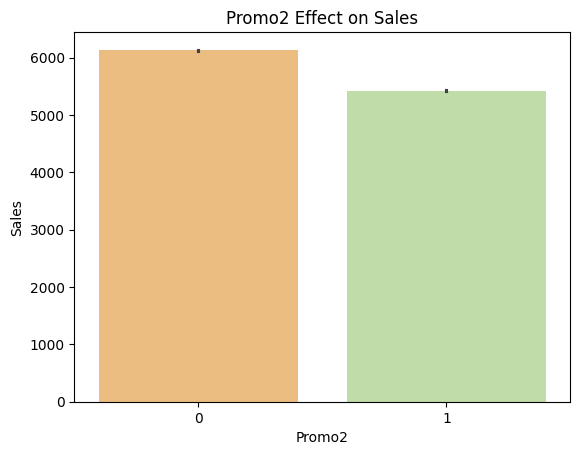

In [ ]:
# Promo2 vs. Sales
sns.barplot(x='Promo2', y='Sales', data=df, palette='Spectral')
plt.title('Promo2 Effect on Sales')
plt.xlabel('Promo2')
plt.ylabel('Sales')

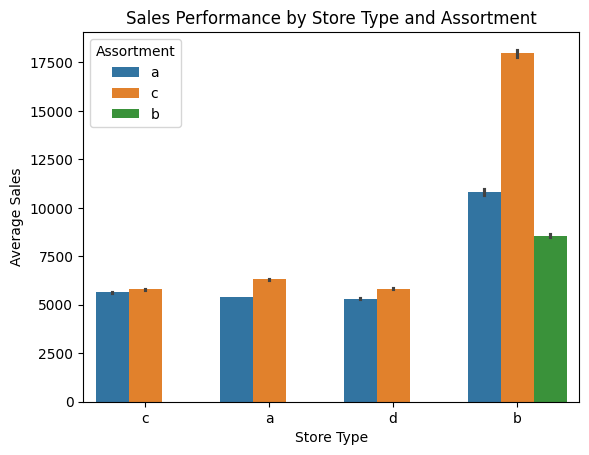

In [ ]:
sns.barplot(x='StoreType', y='Sales', hue='Assortment', data=df)
plt.title('Sales Performance by Store Type and Assortment')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.legend(title='Assortment')

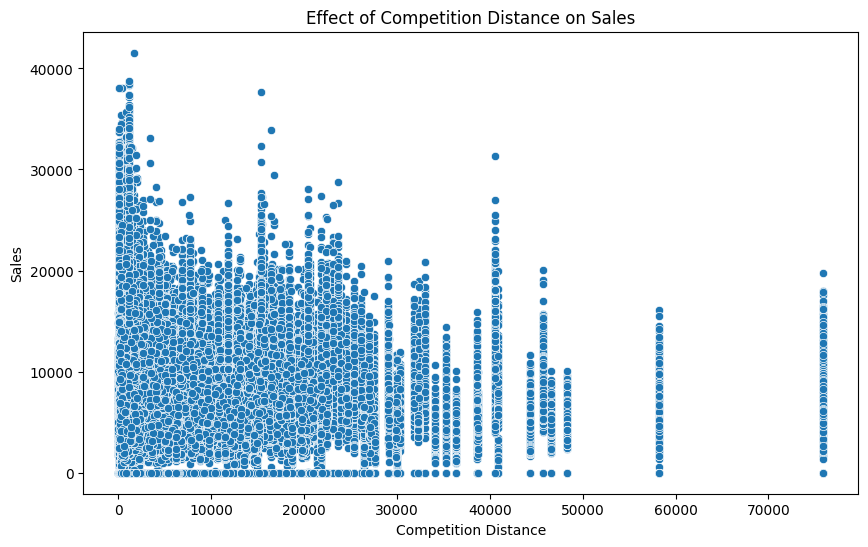

In [ ]:
# Effect of Competition distance on Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=df , palette= "light:#5A9")
plt.title('Effect of Competition Distance on Sales')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

**The Outliers are high in Sales**

<Axes: ylabel='Sales'>

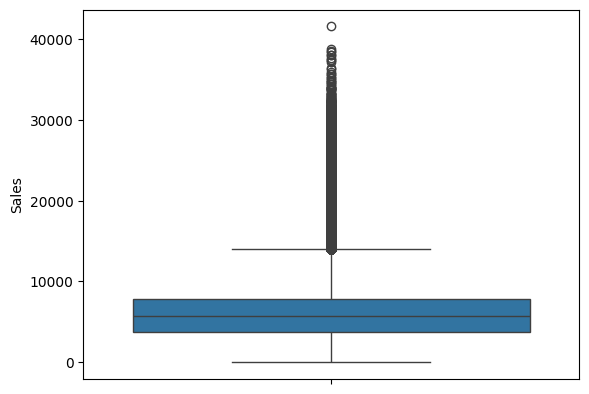

In [ ]:
sns.boxplot(df['Sales'])

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where Sales is outside the lower and upper bounds
df = df[(rossmann_data['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

<Axes: ylabel='Sales'>

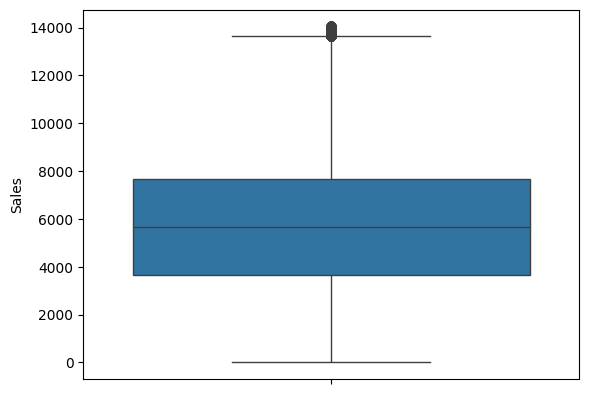

In [ ]:
sns.boxplot(df['Sales'])

# What all manipulations have you done and insights you found?

*  Store type 'a' has the highest total sales, indicating that it contributes the most to the overall sales volume.
*  Store type 'a' also has the highest total number of customers, suggesting that it attracts more foot traffic compared to other store types.
*  Despite having fewer customers, store type 'b' has the highest average sales per transaction, indicating higher spending or larger purchases per customer.
*  Promotions predominantly run on weekdays
*  The average sales exhibit consistent seasonal effects throughout the year, suggesting stable sales patterns regardless of the season.
*  There is no much of Promo2 on Sales
* Among different assortments, store type 'b' exhibits the highest sales performance, indicating potentially more popular or higher-demand products in this assortment.
* There is a noticeable relationship between competition distance and total sales, with stores facing closer competitors showing higher sales variability.
* Outliers are present in the sales data, which are removed using the interquartile range (IQR) method to ensure the accuracy of statistical analysis and modeling

## **Feature Engineering & Data Pre-processing**

Filtering the data by the store if it is closed, cause it does not have sales

In [ ]:
df= df[df['Open']!=0]

In [ ]:
df = df.drop(['Open'], axis=1)

In [ ]:
df_new = df.copy() # Copying the dataframe to avoid unintended consequences when manipulating data

In [ ]:
df_new

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,2015,7,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,2015,7,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,2015,7,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,2015,7,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,2015,7,31,a,a,29910.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,1,2013,1,1,b,a,150.0,0
1016827,733,2,2013-01-01,10765,2377,0,1,2013,1,1,b,b,860.0,0
1016863,769,2,2013-01-01,5035,1248,0,1,2013,1,1,b,b,840.0,1
1017042,948,2,2013-01-01,4491,1039,0,1,2013,1,1,b,b,1430.0,0


Encoding Categorical Variables Storetype and Assortment

In [ ]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

Prepare features and target variable


In [ ]:
X = df_new.drop(columns=['Sales' ,'Date'])
y = df_new['Sales'] #target variable

###  Explain the model which you have used and the feature importance using any model explainability tool?

Random Forest is chosen for its ability to handle non-linearity, robustness to overfitting, and feature importance evaluation, making it suitable for accurate regression predictions across various datasets and applications.

Visualising Important features by Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()

In [ ]:
# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importance = rf_model.feature_importances_

In [ ]:
# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

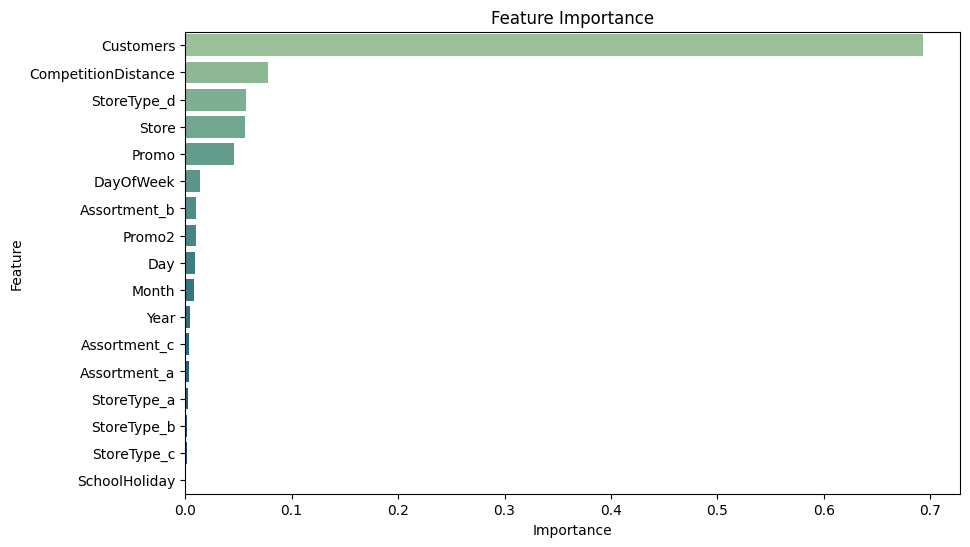

In [ ]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], orient="h", palette='crest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
imp_X = df_new.drop(columns=['Sales' ,'Date'])
y = df_new['Sales']

Split data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(imp_X, y, test_size=0.2, random_state=42)

## ***7. ML Model Implementation***

### ML Model - 1

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# ML Model - 1 Implementation
lr_model = LinearRegression()
# Fit the Algorithm
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the model
y_pred_train = lr_model.predict(X_train) #train
y_pred = lr_model.predict(X_test)

In [ ]:
lr_train_score = lr_model.score(X_train, y_train)
print("Linear Regression training Score:", lr_train_score)

lr_test_score = lr_model.score(X_test, y_test)
print("Linear Regression test Score:", lr_test_score)

Linear Regression training Score: 0.7844084083215375
Linear Regression test Score: 0.7827399423109835


In [ ]:
# Evaluate model performance
lr_mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", lr_mse)


lr_r2 = r2_score(y_test, y_pred)
print('Linear Regression R2 score:', lr_r2)

Linear Regression Mean Squared Error: 1322994.5371656541
Linear Regression R2 score: 0.7827399423109835


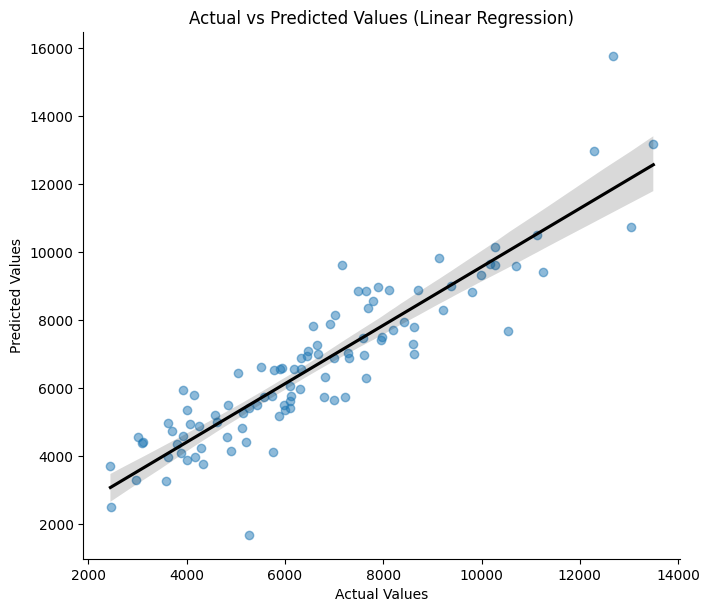

In [ ]:
evaluation_df = pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_pred[:100]})

# Plot using lmplot
sns.lmplot(x='Actual', y='Predicted', data=evaluation_df, height=6, aspect=1.2, scatter_kws={'alpha':0.5},  line_kws={'color': 'black'})
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### 2. Linear Regression using Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lr_param_grid = {
    'fit_intercept': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=lr_param_grid, scoring='neg_mean_squared_error', cv=5)


# Fit the Algorithm
grid_search.fit(X_train, y_train)

#Best params
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict on the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'fit_intercept': False}


In [ ]:
y_pred_train = best_model.predict(X_train) #train

In [ ]:
best_lr_test_score = best_model.score(X_test, y_test)
print("Linear Regression test Score:", best_lr_test_score)

best_lr_train_score = best_model.score(X_train, y_train)
print("Linear Regression training Score:", best_lr_train_score)

Linear Regression test Score: 0.782739942310984
Linear Regression training Score: 0.7844084083215377


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 The training and test scores for Linear Regression remained the same before and after hyperparameter tuning. This suggests that the default hyperparameters provided reasonable performance and that hyperparameter tuning did not significantly improve the model's performance in this case.

### ML Model - 2

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Initialize and train Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predict on the model
dt_y_pred_train = dt_model.predict(X_train) #train
dt_y_pred = dt_model.predict(X_test)

In [ ]:
dt_train_score = dt_model.score(X_train, y_train)
print("Decision tree training Score:", dt_train_score)

dt_test_score = dt_model.score(X_test, y_test)
print("Decision tree test Score:", dt_test_score)

Decision tree training Score: 1.0
Decision tree test Score: 0.9378610488556369


When the training score is 1.0, it indicates that the model fits the training data perfectly. However, this could be a sign of overfitting.

**Decsion Tree with cross-validation and hyperparameter tuning**

In [ ]:
# Define hyperparameters grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],  # Adjust as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize Decision Tree Regressor
dt_model_cv = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model_cv, param_grid=param_grid_dt, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree Regression:", best_params_dt)

Best Hyperparameters for Decision Tree Regression: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# Make predictions with the best model
best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)

In [ ]:
best_dt_test_score = best_model_dt.score(X_test, y_test)
print("Decision Tree test Score:", best_dt_test_score)

best_dt_train_score = best_model_dt.score(X_train, y_train)
print("Decision Tree training Score:", best_dt_train_score)

Decision Tree test Score: 0.9495700327840532
Decision Tree training Score: 0.9819876943421618


In [ ]:
dt_r2 = r2_score(y_test, y_pred_dt)
print('Decision tree R2 score:', dt_r2)

Decision tree R2 score: 0.9495700327840532


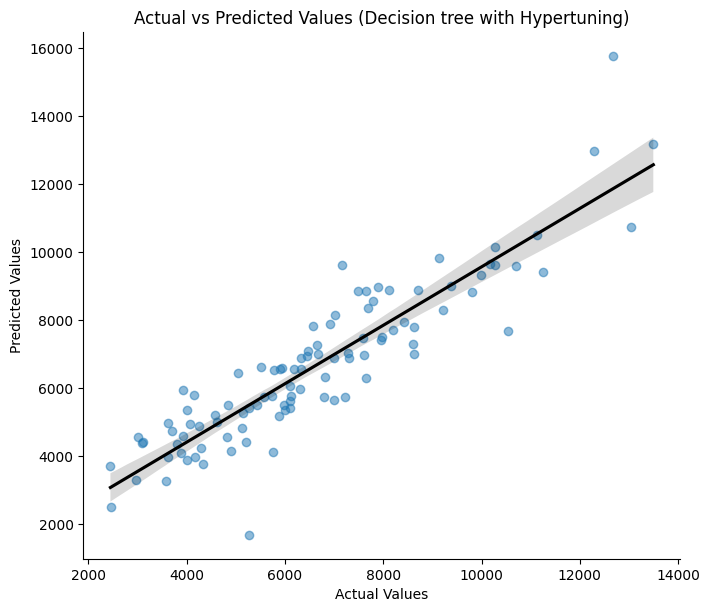

In [ ]:
evaluation_df_dt = pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_pred_dt[:100]})

# Plot using lmplot
sns.lmplot(x='Actual', y='Predicted', data=evaluation_df, height=6, aspect=1.2, scatter_kws={'alpha':0.5},  line_kws={'color': 'black'})
plt.title('Actual vs Predicted Values (Decision tree with Hypertuning)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning, we observe that the Decision Tree model's training score decreased slightly, indicating that the model may be less prone to overfitting. However, the test score significantly improved from 0.9378 to 0.9495, suggesting that the tuned model generalizes better to unseen data.


### ML Model - 3

**Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# Initialize Elastic Net Regression model
elastic_net_model = ElasticNet(random_state=42)


In [ ]:
# Fit the model
elastic_net_model.fit(X_train, y_train)

# Make predictions
y_pred_elastic_net = elastic_net_model.predict(X_test)

In [ ]:
# Model Performance
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print("Elastic Net Regression Mean Squared Error:", mse_elastic_net)


train_score_elastic_net = elastic_net_model.score(X_train, y_train)
print("Elastic Net Regression train Score:", train_score_elastic_net)

test_score_elastic_net = elastic_net_model.score(X_test, y_test)
print("Elastic Net Regression test Score:", test_score_elastic_net)

Elastic Net Regression Mean Squared Error: 1942067.3498890544
Elastic Net Regression train Score: 0.6808931432346912
Elastic Net Regression test Score: 0.681076790100139


In [ ]:
param_grid_elastic_net = {
    'alpha': [0.001, 0.01, 0.1, 1.0],  # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # L1 ratio (mixing parameter)
}


In [ ]:
# Initialize Elastic Net Regression model
elastic_net_model_cv = ElasticNet(random_state=42)

# Initialize GridSearchCV
grid_search_elastic_net = GridSearchCV(estimator=elastic_net_model_cv, param_grid=param_grid_elastic_net, scoring='neg_mean_squared_error', cv=5)

In [ ]:
grid_search_elastic_net.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params_elastic_net = grid_search_elastic_net.best_params_
print("Best Hyperparameters for Elastic Net Regression:", best_params_elastic_net)

Best Hyperparameters for Elastic Net Regression: {'alpha': 0.001, 'l1_ratio': 0.9}


In [ ]:
# Make predictions with the best model
best_model_elastic_net = grid_search_elastic_net.best_estimator_
y_pred_elastic_net = best_model_elastic_net.predict(X_test)

In [ ]:
# Evaluate model performance by mse
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print("Elastic Net Regression with Hyperparameter Tuning Mean Squared Error:", mse_elastic_net)

Elastic Net Regression with Hyperparameter Tuning Mean Squared Error: 1323035.2338348646


In [ ]:
best_train_score_elastic_netelastic_net = best_model_elastic_net.score(X_train, y_train)
print("Elastic Net Regression with Hyperparameter train Score:", best_train_score_elastic_netelastic_net)

best_test_score_elastic_netelastic_net = best_model_elastic_net.score(X_test, y_test)
print("Elastic Net Regression with Hyperparameter test Score:", best_test_score_elastic_netelastic_net)

Elastic Net Regression with Hyperparameter train Score: 0.7844052251000553
Elastic Net Regression with Hyperparameter test Score: 0.7827332591687239


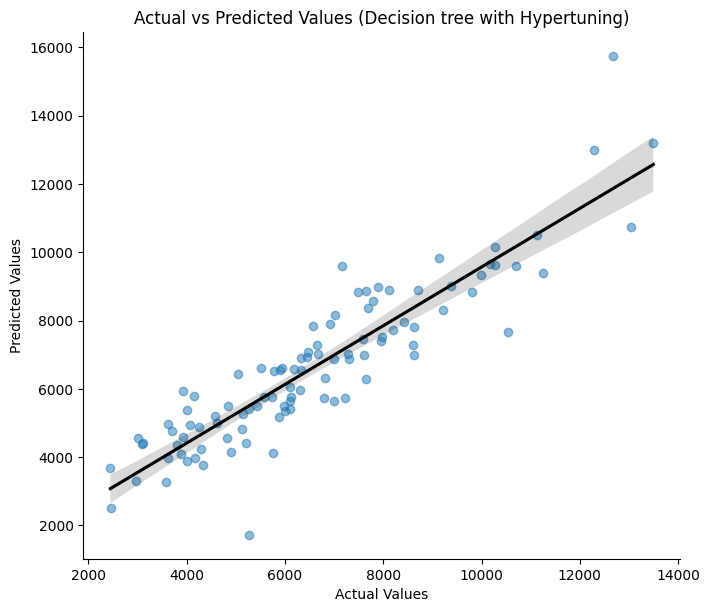

In [ ]:
evaluation_df_En = pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_pred_elastic_net[:100]})

# Plot using lmplot
sns.lmplot(x='Actual', y='Predicted', data=evaluation_df_En, height=6, aspect=1.2, scatter_kws={'alpha':0.5},  line_kws={'color': 'black'})
plt.title('Actual vs Predicted Values (Decision tree with Hypertuning)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

###### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The train score increased from 0.6809 to 0.7844.
The test score increased from 0.6811 to 0.7827.
This improvement indicates that the hyperparameter tuning process successfully optimized the Elastic Net Regression model, leading to better performance on both the training and test sets. The increase in both train and test scores suggests that the tuned model generalizes well to unseen data and performs better overall.

Overall, hyperparameter tuning has resulted in a noticeable enhancement in the Elastic Net Regression model's predictive accuracy, making it more effective for the given regression task.

In [ ]:
evaluated_model_score = pd.DataFrame({"Train Score": [lr_train_score, best_lr_train_score, dt_train_score, best_dt_train_score, train_score_elastic_net,best_train_score_elastic_netelastic_net], 'Test Score': [lr_test_score, best_lr_test_score, dt_test_score, best_dt_test_score, test_score_elastic_net,best_test_score_elastic_netelastic_net]}, index= ['Linear Regression', "Linear Regression(Hypertuning)", "Decision Tree", 'Decision Tree(Hypertuning)', 'Elastic Net', 'Elastic Net(Hypertuning)'])

In [ ]:
evaluated_model_score

,Train Score,Test Score
Linear Regression,0.784408,0.782740
Linear Regression(Hypertuning),0.784408,0.782740
Decision Tree,1.000000,0.937861
Decision Tree(Hypertuning),0.981988,0.949570
Elastic Net,0.680893,0.681077
Elastic Net(Hypertuning),0.784405,0.782733


### Which ML model did you choose from the above created models as your final prediction model and why?

*  The Decision Tree Regression model with hyperparameter tuning is chosen as the final prediction model because it showed the best performance improvement after tuning. Before tuning, it already had a perfect score on the training data, but tuning further improved its ability to make accurate predictions on new, unseen data.
*   This means it can generalize well beyond the data it was trained on, which is crucial for real-world applications. Additionally, Decision Trees are easy to understand and interpret, making them valuable for stakeholders who need insights into how predictions are made. Overall, the Decision Tree model with hyperparameter tuning strikes a good balance between performance and interpretability, making it the preferred choice for the final prediction model

# **Conclusion**

*  Successfully addressed the challenge of predicting daily sales for Rossmann drug stores by considering various influencing factors such as promotions, holidays, and competition.
*  Valuable insights were gained through exploratory data analysis (EDA) on both Rossmann and store data, providing a deeper understanding of the relationships between sales and factors like customer count, promotions, holidays, and store characteristics.
*  Implemented data preprocessing steps and feature engineering techniques to prepare the data for modeling, ensuring optimal performance of the predictive models.
*  Chose the Decision Tree Regression model with hyperparameter tuning as the final prediction model due to its superior performance and interpretability, leading to significant improvements in accuracy.
*  The developed model provides interpretable results, enabling stakeholders to understand how predictions are made and make informed decisions based on actionable insights.
*  Utilize insights on the impact of promotions to optimize promotional strategies, ensuring effective timing and types of promotions.
Use sales forecasts to optimize staffing levels and inventory management, ensuring adequate resources during peak sales periods while minimizing excess stock.
*  Plan staffing, promotions, and inventory management strategies in advance for holidays and school breaks, considering their impact on sales.
*  Analyze individual store performance based on model predictions, identifying areas for improvement and implementing targeted strategies.
*  Enhance the overall customer experience by tailoring promotions, product offerings, and store layouts to meet customer preferences and needs.
*Monitor the competitive landscape and adjust pricing, promotions, and marketing strategies accordingly to stay ahead of competitors.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***